In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

In [2]:
data = pd.read_csv("data/kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15', 'id']

In [5]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [8]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [9]:
df.waterfront.fillna(value=0, inplace = True)

In [10]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [11]:
for col in df.columns:
    try:
        print(col, df[col].value_counts())
    except:
        print(col, df[col].value_counts())   
    print('\n')

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1034, dtype: i

In [12]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [13]:
print('bathrooms', sorted(set(df['bathrooms'])))

bathrooms [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


In [14]:
#typo or outlier, need to drop 
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
15856,1.75


In [15]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [16]:
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())   
    print('\n')

price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116




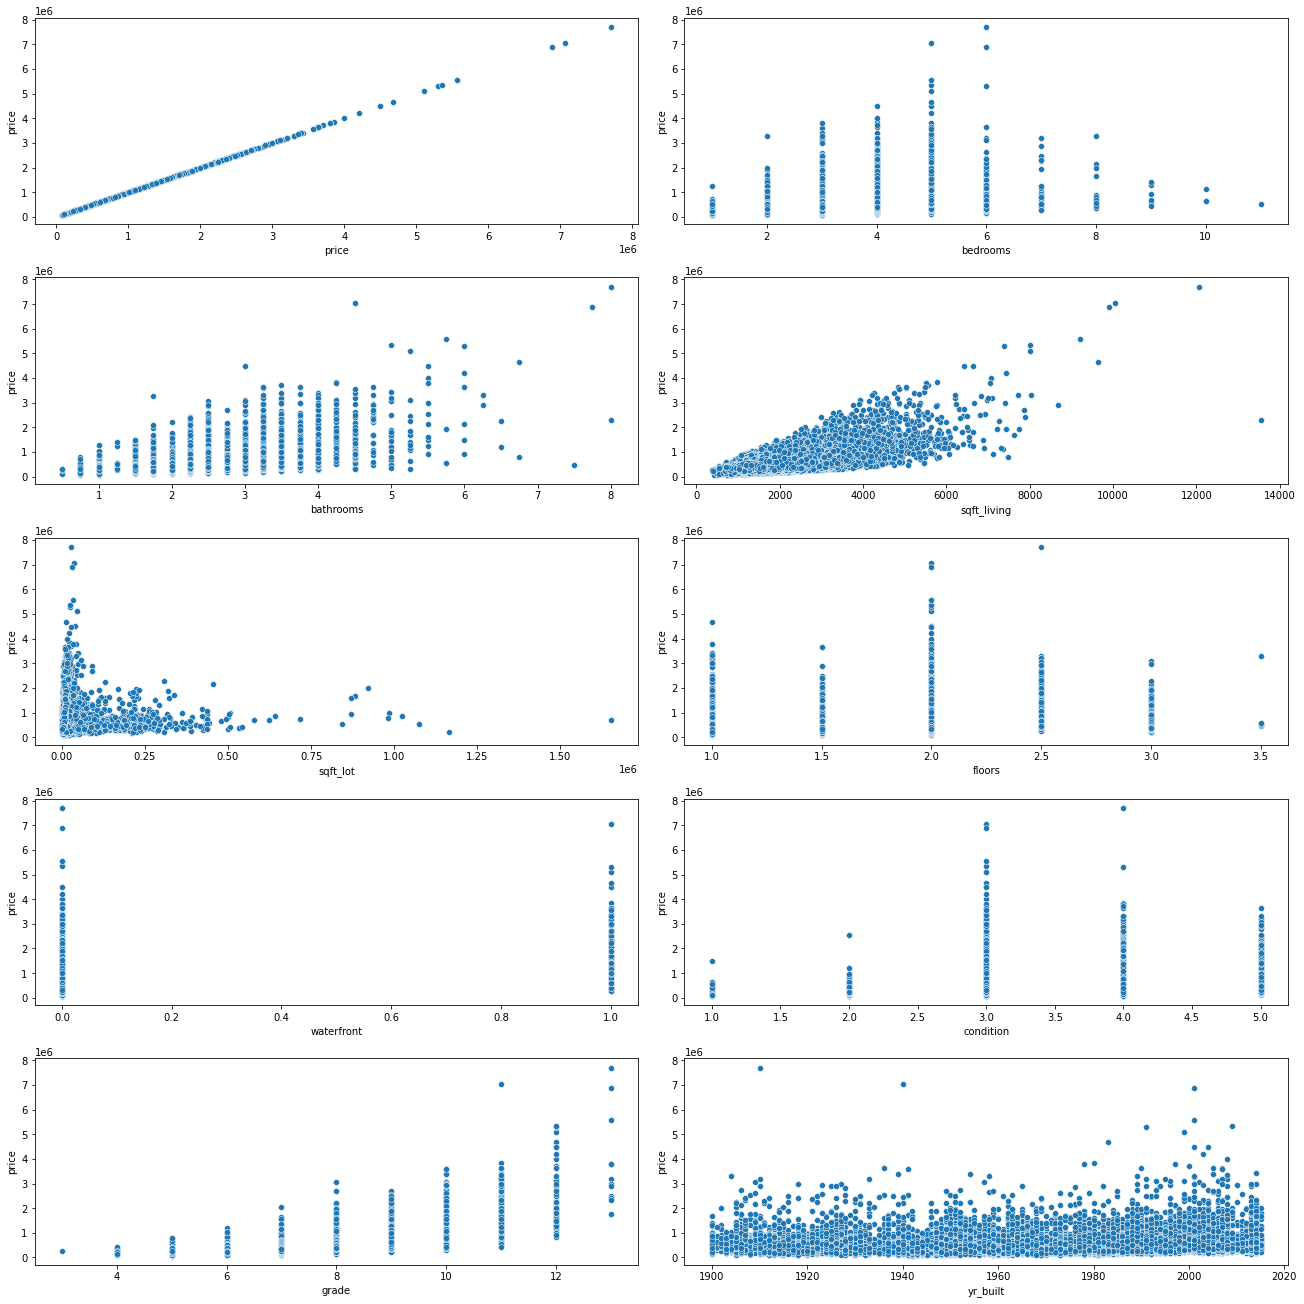

In [17]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)
for axx, column in zip(axes.flatten(), df.columns):
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

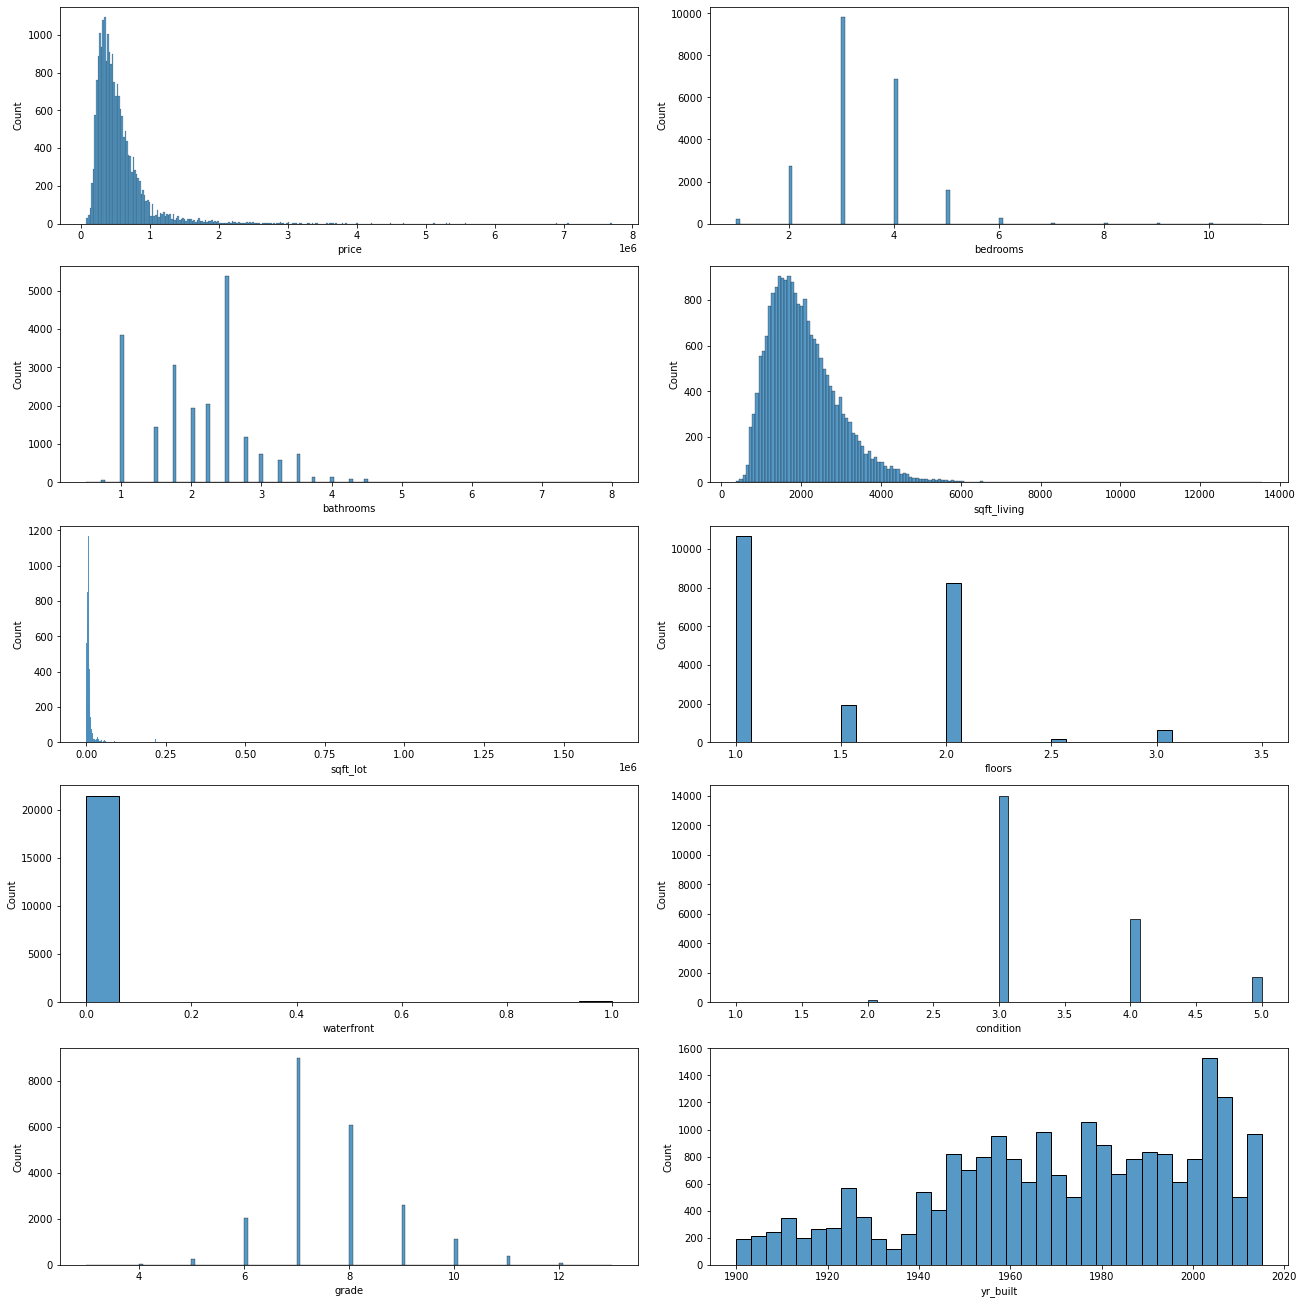

In [18]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.histplot(x=df[column], data=df,ax=axx)
    

In [19]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_living'].quantile(q=q)))

0.9 percentile: 3255.0
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [20]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [21]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21372.0
0.91 percentile: 24151.70000000002
0.92 percentile: 28506.400000000023
0.93 percentile: 34848.0
0.94 percentile: 37643.5
0.95 percentile: 43308.75
0.96 percentile: 50655.600000000006
0.97 percentile: 67384.89999999976
0.98 percentile: 107157.0


In [22]:
stats.kurtosis(df.sqft_living)

5.250278624437211

In [23]:
stats.skew(df.sqft_living)

1.4730409364724821

In [24]:
stats.skew(df.sqft_lot)

13.071406775919803

kurtosis higher than 3 indicates heavier tails than a normal distribution

In [25]:
stats.kurtosis(df.sqft_lot)

285.4168446506654

A high positive skewness is observed as there are more values on the left side of the 
distribution mean than those on right side, longer tail to the right side 

In [26]:
#will need to log transform later
loglot= np.log(df.sqft_lot)

In [27]:
stats.kurtosis(loglot)

3.3286839377382753

In [28]:
stats.skew(loglot)

0.9623750156615982

In [29]:
#better without log transfomation 
logliv= np.log(df.sqft_living)

In [30]:
stats.kurtosis(logliv)

-0.0793932778715023

In [31]:
stats.skew(logliv)

-0.027409771717033345

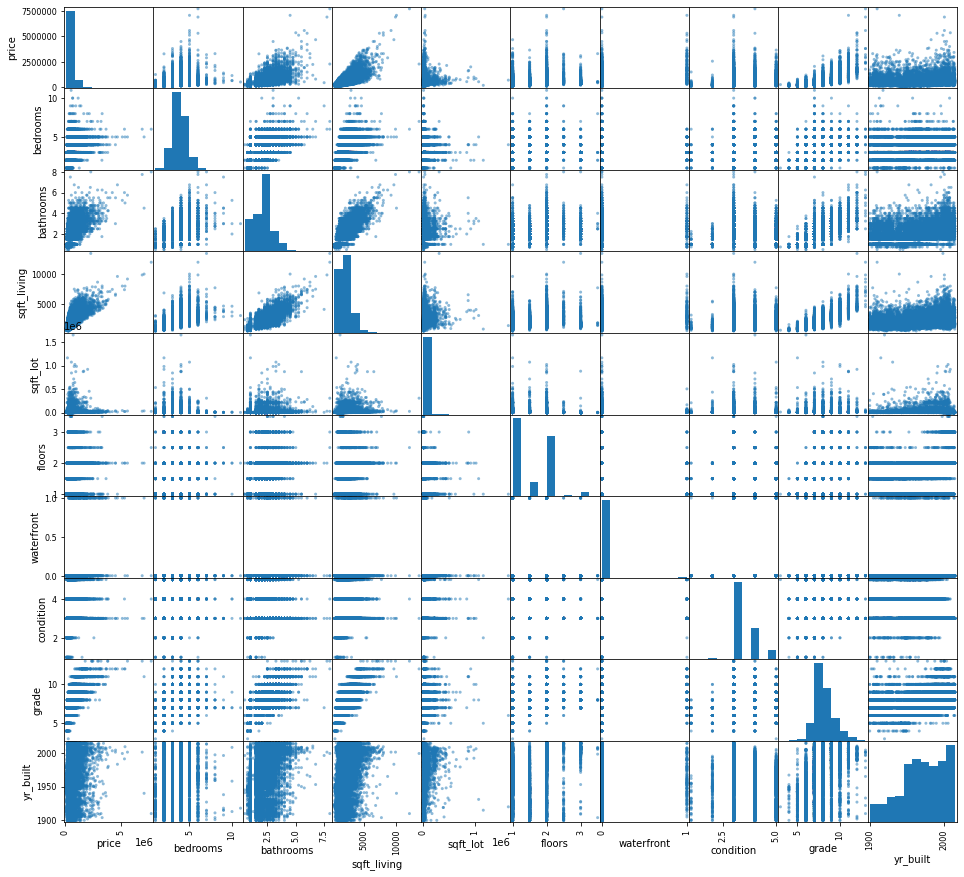

In [32]:
pd.plotting.scatter_matrix(df,figsize  = [16, 15]);

<AxesSubplot:>

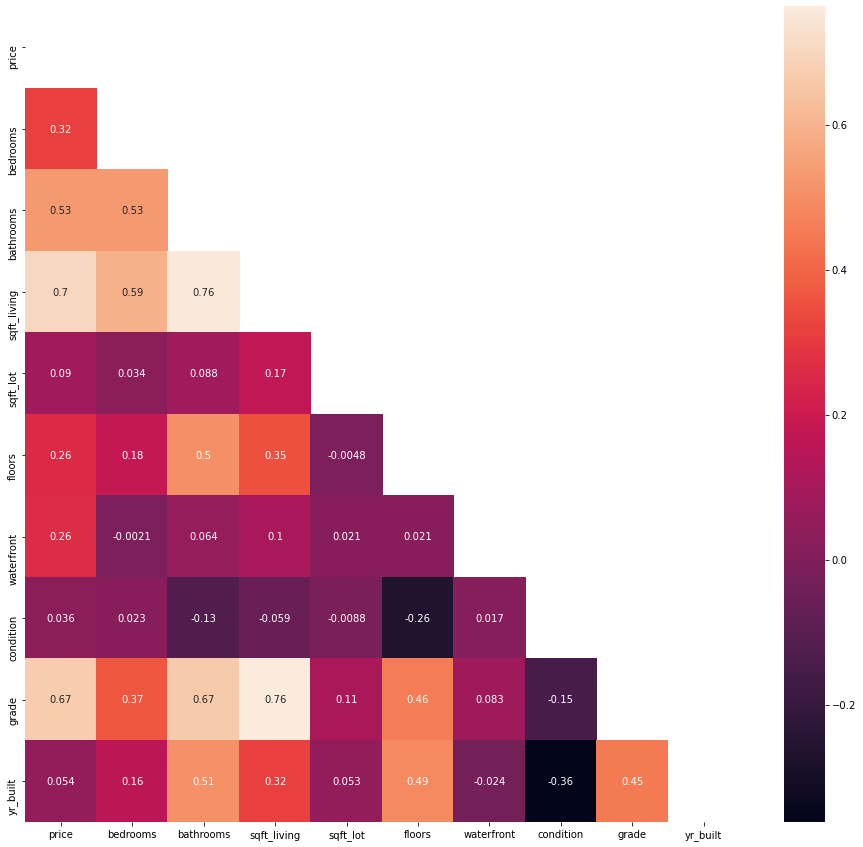

In [33]:
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

In [34]:

x=df.drop('price', axis=1).copy()
y=df['price']

#testing for VIF
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.Series(vif, index=x.columns, name="Variance Inflation Factor")            

bedrooms        24.925319
bathrooms       24.650108
sqft_living     25.496831
sqft_lot         1.185909
floors          13.135154
waterfront       1.025683
condition       29.531908
grade          125.017191
yr_built       126.188002
Name: Variance Inflation Factor, dtype: float64

#Binning yr_built
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = [1,2,3,4,5,6]
x['yr_built_binned'] = pd.cut(x['yr_built'], bins,labels=labels)

x['yr_built_binned'].isna().sum()

set(x['yr_built_binned'])

In [35]:
#spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
#seperating two types of predictors 
categorical=['bedrooms','bathrooms','floors', 'waterfront', 'condition', 'grade']
con = ['sqft_living','sqft_lot']

In [37]:
#creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(x_train[categorical])
dummies_encoded_train = ohe.transform(x_train[categorical])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns=ohe.get_feature_names(categorical))


In [38]:
dummies_encoded_train

,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17271,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17272,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17273,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
dummies_encoded_test= ohe.transform(x_test[categorical])
dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns=ohe.get_feature_names(categorical) )

dummies_encoded_train.drop('yr_built_binned_nan', axis=1).copy()

In [40]:
#log transformation 
transformer = FunctionTransformer(np.log)
x_train_lot= transformer.fit_transform(x_train['sqft_lot'])
x_test_lot= transformer.transform(x_test['sqft_lot'])


In [41]:
#combine the continuous columns 
x_train_log = pd.concat([x_train_lot, x_train['sqft_living']], axis=1)
x_test_log = pd.concat([x_test_lot, x_test['sqft_living']], axis=1)

In [42]:
#standardized since both continuous columns seem to have gaussian distribution
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_log)
x_test_scaled = scaler.transform(x_test_log)
y_train_scaled = scaler.fit_transform(y_train.to_frame())
y_test_scaled = scaler.transform(y_test.to_frame())

In [43]:
y_train_scaled =pd.DataFrame(y_train_scaled, columns= ['price'])
y_test_scaled = pd.DataFrame(y_test_scaled, columns= ['price'])

In [44]:
x_train_scaled =pd.DataFrame(x_train_scaled, columns= ['sqft_living','sqft_lot'])
x_test_scaled =pd.DataFrame(x_test_scaled, columns= ['sqft_living','sqft_lot'])


non_normal = df['price','sqft_living','sqft_lot']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))

In [47]:
x_train_final = pd.concat([x_train_scaled,dummies_encoded_train], axis=1)

In [48]:
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]

In [49]:
x_train_final.drop(['bedrooms_1','bathrooms_0_5', 'floors_1_0', 'waterfront_0_0', 'condition_1', 'grade_3'], axis =1, inplace =True)

In [50]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final,y_train_scaled)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
sqft_lot: True
bedrooms_2: False
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bedrooms_6: True
bedrooms_7: True
bedrooms_8: True
bedrooms_9: True
bedrooms_10: True
bedrooms_11: True
bathrooms_0_75: True
bathrooms_1_0: True
bathrooms_1_25: True
bathrooms_1_5: True
bathrooms_1_75: True
bathrooms_2_0: True
bathrooms_2_25: True
bathrooms_2_5: True
bathrooms_2_75: True
bathrooms_3_0: True
bathrooms_3_25: True
bathrooms_3_5: True
bathrooms_3_75: True
bathrooms_4_0: True
bathrooms_4_25: True
bathrooms_4_5: True
bathrooms_4_75: True
bathrooms_5_0: True
bathrooms_5_25: True
bathrooms_5_5: True
bathrooms_5_75: True
bathrooms_6_0: True
bathrooms_6_25: True
bathrooms_6_5: True
bathrooms_6_75: True
bathrooms_7_75: True
bathrooms_8_0: True
floors_1_5: True
floors_2_0: True
floors_2_5: True
floors_3_0: True
floors_3_5: True
waterfront_1_0: True
condition_2: False
condition_3: False
condition_4: True
condition_5: True
grade_4: False
grade_5: False
grade

In [51]:
train_final=  pd.concat([y_train_scaled,x_train_final], axis=1)

In [53]:
pd.set_option("display.max_rows", 66, "display.max_columns", 66)
corr= train_final.corr()
corr

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0_75,bathrooms_1_0,bathrooms_1_25,bathrooms_1_5,bathrooms_1_75,bathrooms_2_0,bathrooms_2_25,bathrooms_2_5,bathrooms_2_75,bathrooms_3_0,bathrooms_3_25,bathrooms_3_5,bathrooms_3_75,bathrooms_4_0,bathrooms_4_25,bathrooms_4_5,bathrooms_4_75,bathrooms_5_0,bathrooms_5_25,bathrooms_5_5,bathrooms_5_75,bathrooms_6_0,bathrooms_6_25,bathrooms_6_5,bathrooms_6_75,bathrooms_7_75,bathrooms_8_0,floors_1_5,floors_2_0,floors_2_5,floors_3_0,floors_3_5,waterfront_1_0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
price,1.000000,0.159242,0.701764,-0.142457,-0.186297,0.179512,0.180534,0.098899,0.052976,0.029203,0.020379,0.010471,-0.000438,-0.039365,-0.245909,0.013555,-0.096943,-0.092851,-0.069377,-0.002860,0.019064,0.076763,0.089042,0.201690,0.197433,0.150989,0.160840,0.172001,0.145537,0.139514,0.100930,0.056504,0.099808,0.093791,0.118452,0.048469,0.013182,0.064023,0.131011,0.129833,0.019121,0.228710,0.131832,0.020847,0.020150,0.262674,-0.050957,0.001518,-0.028934,0.064238,-0.031166,-0.084758,-0.210532,-0.315027,0.004923,0.238935,0.339897,0.354791,0.283652,0.237038
sqft_living,0.159242,1.000000,0.345368,-0.175348,-0.038611,0.123975,0.068690,0.028828,0.016752,-0.003592,-0.008205,0.004199,-0.004064,0.014980,-0.050816,-0.021187,-0.059729,0.048409,-0.021160,0.001101,-0.028561,0.042030,0.008766,0.013373,0.029599,0.037809,0.046897,0.044976,0.041015,0.024669,0.027669,0.017975,0.026804,0.028673,0.030985,0.017539,0.002628,0.012747,0.011514,0.029154,-0.020482,-0.044555,-0.030890,-0.293176,-0.033954,0.071346,0.041494,-0.114421,0.113483,0.001211,-0.000543,0.018270,-0.015870,-0.077636,-0.096664,0.079951,0.156139,0.129472,0.090197,0.032828
sqft_lot,0.701764,0.345368,1.000000,-0.348209,-0.275078,0.353684,0.292560,0.149732,0.095128,0.046279,0.030331,0.023632,0.007600,-0.073536,-0.457444,-0.008943,-0.155893,-0.129184,-0.095739,0.008720,0.184547,0.155721,0.139654,0.208519,0.268917,0.157209,0.178957,0.171420,0.175002,0.116071,0.099576,0.063699,0.090005,0.071771,0.088561,0.054558,0.034599,0.075871,0.064662,0.125474,-0.058294,0.418476,0.100387,-0.051352,0.007838,0.108431,-0.063568,0.099420,-0.083386,-0.015128,-0.049872,-0.127043,-0.312825,-0.356622,0.069814,0.319746,0.372598,0.338010,0.238306,0.153875
bedrooms_2,-0.142457,-0.175348,-0.348209,1.000000,-0.347212,-0.262328,-0.107892,-0.042816,-0.017185,-0.009179,-0.006490,-0.004104,-0.002902,0.037269,0.380436,0.005622,0.060365,-0.033668,-0.014310,-0.068705,-0.153434,-0.079766,-0.063454,-0.054602,-0.070123,-0.032298,-0.030671,-0.023798,-0.026500,-0.012985,-0.011970,-0.008708,-0.006490,-0.004104,-0.006490,-0.002902,-0.002902,-0.004104,-0.002902,-0.004104,-0.026863,-0.161081,-0.022817,0.045324,0.009597,0.014476,0.041904,-0.007423,0.003297,-0.009782,0.050283,0.103589,0.260318,0.018092,-0.083282,-0.108424,-0.075333,-0.047899,-0.021784,-0.009627
bedrooms_3,-0.186297,-0.038611,-0.275078,-0.347212,1.000000,-0.626127,-0.257517,-0.102193,-0.041017,-0.021908,-0.015489,-0.009795,-0.006926,-0.027380,0.013905,-0.006211,0.061678,0.129099,0.055338,0.049630,-0.023195,-0.108984,-0.077560,-0.054320,-0.092209,-0.057726,-0.060108,-0.047448,-0.056525,-0.030992,-0.028571,-0.020784,-0.015489,-0.009795,-0.015489,-0.006926,-0.006926,-0.009795,-0.006926,-0.009795,-0.029631,-0.121700,-0.017635,0.062740,0.004783,-0.018175,-0.010015,-0.011973,0.024964,-0.014316,-0.026698,-0.041525,-0.018931,0.155885,0.005113,-0.099355,-0.095157,-0.087044,-0.043940,-0.018369
bedrooms_4,0.179512,0.123975,0.353684,-0.262328,-0.626127,1.000000,-0.194561,-0.077210,-0.030989,-0.016552,-0.011703,-0.007401,-0.005233,-0.036013,-0.236553,-0.010467,-0.078442,-0.072621,-0.033176,0.020023,0.181344,0.112494,0.050934,0.043519,0.086539,0.033176,0.022271,0.024899,-0.002966,-0.001541,-0.001816,0.006029,0.002874,0.004122,-0.011703,-0.005233,-0.005233,-0.00

In [54]:
from statsmodels.tools.tools import add_constant

X = add_constant(x_train_final)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.Series(vif, index=X.columns, name="Variance Inflation Factor") 


const             22853.263324
sqft_living           1.463232
sqft_lot              5.215229
bedrooms_2           14.267428
bedrooms_3           31.801994
bedrooms_4           29.100559
bedrooms_5           10.148110
bedrooms_6            2.718359
bedrooms_7            1.339408
bedrooms_8            1.109515
bedrooms_9            1.060136
bedrooms_10           1.076783
bedrooms_11           1.010031
bathrooms_0_75       15.816515
bathrooms_1_0       635.340500
bathrooms_1_25        2.010537
bathrooms_1_5       274.901466
bathrooms_1_75      527.836601
bathrooms_2_0       352.815793
bathrooms_2_25      370.719367
bathrooms_2_5       815.793798
bathrooms_2_75      223.488411
bathrooms_3_0       145.433317
bathrooms_3_25      114.188824
bathrooms_3_5       142.160216
bathrooms_3_75       31.792798
bathrooms_4_0        28.863095
bathrooms_4_25       17.894439
bathrooms_4_5        21.919875
bathrooms_4_75        6.088478
bathrooms_5_0         5.327047
bathrooms_5_25        3.338039
bathroom

In [55]:
train_final.shape

(17276, 60)

In [56]:
x_train_final.columns

Index(['sqft_living', 'sqft_lot', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9',
       'bedrooms_10', 'bedrooms_11', 'bathrooms_0_75', 'bathrooms_1_0',
       'bathrooms_1_25', 'bathrooms_1_5', 'bathrooms_1_75', 'bathrooms_2_0',
       'bathrooms_2_25', 'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_3_0',
       'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0',
       'bathrooms_4_25', 'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_0',
       'bathrooms_5_25', 'bathrooms_5_5', 'bathrooms_5_75', 'bathrooms_6_0',
       'bathrooms_6_25', 'bathrooms_6_5', 'bathrooms_6_75', 'bathrooms_7_75',
       'bathrooms_8_0', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'floors_3_5', 'waterfront_1_0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13'

In [67]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train_final, y_train_scaled)
DummyRegressor()
dummy_regr.predict(x_train_final)
dummy_regr.score(x_train_final, y_train_scaled)

0.0

In [57]:
outcome = 'price'
predictors = x_train_final
formula = outcome + '~' + "+".join(predictors.columns)
model = smf.ols(formula=formula, data=train_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     590.9
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:50:10   Log-Likelihood:                -14952.
No. Observations:               17276   AIC:                         3.002e+04
Df Residuals:                   17216   BIC:                         3.049e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5126      0.662     -0.774      0.439      -1.811       0.786
sqft_living       -0.1055      0.005    -19.909      0.000      -0.116      -0.095
sqft_lot           0.4262      0.010     42.594      0.000       0.407       0.446
bedrooms_2        -0.0242      0.050     -0.487      0.626      -0.122       0.073
bedrooms_3        -0.1549      0.050     -3.121      0.002      -0.252      -0.058
bedrooms_4        -0.2132      0.051     -4.211      0.000      -0.312      -0.114
bedrooms_5        -0.2296      0.053     -4.307      0.000      -0.334      -0.125
bedrooms_6        -0.2457      0.065     -3.771      0.000      -0.373      -0.118
bedrooms_7        -0.5277      0.113     -4.679      0.000      -0.749      -0.307
bedrooms_8        -0.2110      0.192     -1.099      0.272      -0.587       0.165
bedrooms_9        -0.1383      0.265     -0.521      0.602      -0.658       0.382
bedrooms_10       -0.4749      0.423     -1.124      0.261      -1.303       0.353
bedrooms_11       -0.3305      0.579     -0.571      0.568      -1.465       0.804
bathrooms_0_75     0.2026      0.299      0.678      0.498      -0.383       0.788
bathrooms_1_0      0.2810      0.289      0.974      0.330      -0.285       0.847
bathrooms_1_25     0.1849      0.408      0.453      0.651      -0.616       0.985
bathrooms_1_5      0.2145      0.289      0.742      0.458      -0.352       0.781
bathrooms_1_75     0.2187      0.289      0.757      0.449      -0.347       0.785
bathrooms_2_0      0.2103      0.289      0.728      0.467      -0.356       0.777
bathrooms_2_25     0.2213      0.289      0.766      0.444      -0.345       0.788
bathrooms_2_5      0.0892      0.289      0.309      0.757      -0.477       0.655
bathrooms_2_75     0.1543      0.289      0.533      0.594      -0.413       0.722
bathrooms_3_0      0.2553      0.290      0.881      0.378      -0.313       0.823
bathrooms_3_25     0.4326      0.290      1.491      0.136      -0.136       1.002
bathrooms_3_5      0.2465      0.290      0.850      0.395      -0.322       0.815
bathrooms_3_75     0.5829      0.294      1.983      0.047       0.007       1.159
bathrooms_4_0      0.4963      0.295      1.684      0.092      -0.081       1.074
bathrooms_4_25     0.8536      0.298      2.862      0.004       0.269       1.438
bathrooms_4_5      0.4965      0.297      1.673      0.094      -0.085       1.078
bathrooms_4_75     1.5361      0.318      4.831      0.000       0.913       2.159
bathrooms_5_0      0.9069      0.323      2.811      0.005       0.275       1.539
bathrooms_5_25     0.8810      0.351      2.511      0.012       0.193       1.569
bathrooms_5_5      1.0336      0.399      2.587      0.010       0.251       1.817
bathrooms_5_75     2.6290      0.515      5.108      0.000       1.620       3.638
bathrooms_6_

In [70]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,x_train_final, y_train_scaled, cv=3)

TypeError: estimator should be an estimator implementing 'fit' method, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f96c8450d00> was passed

In [61]:
#selecting only the ones that are statistically significant 
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

60 28
['sqft_living', 'sqft_lot', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-0.5126,0.662,-0.774,0.439,-1.811,0.786
sqft_living,-0.1055,0.005,-19.909,0.000,-0.116,-0.095
sqft_lot,0.4262,0.010,42.594,0.000,0.407,0.446
bedrooms_2,-0.0242,0.050,-0.487,0.626,-0.122,0.073
bedrooms_3,-0.1549,0.050,-3.121,0.002,-0.252,-0.058


In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

outcome = 'price'
predictors2 ='floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0', 'floors_3_5','condition_1', 'condition_2','condition_3'
formula = outcome + '~' + "+".join(predictors2)
model1 = smf.ols(formula=formula, data=train_final).fit()
model1.summary()


In [73]:
outcome = 'price'
predictors ='sqft_living'
formula = outcome + '~' + predictors
model2 = smf.ols(formula=formula, data=train_final).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     449.4
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.72e-98
Time:                        09:02:53   Log-Likelihood:                -24292.
No. Observations:               17276   AIC:                         4.859e+04
Df Residuals:                   17274   BIC:                         4.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.816e-17      0.008   5.08e-15      1.000      -0.015       0.015
sqft_living     0.1592      0.008     21.200      0.000       0.145       0.174
==============================================================================
Omnibus:                    14843.887   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           796474.361
Skew:                           3.868   Prob(JB):                         0.00
Kurtosis:                      35.351   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
outcome = 'price'
predictors ='sqft_lot'
formula = outcome + '~' + predictors
model3 = smf.ols(formula=formula, data=train_final).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:02:56   Log-Likelihood:                -18655.
No. Observations:               17276   AIC:                         3.731e+04
Df Residuals:                   17274   BIC:                         3.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.816e-17      0.005   7.04e-15      1.000      -0.011       0.011
sqft_lot       0.7018      0.005    129.466      0.000       0.691       0.712
==============================================================================
Omnibus:                    11538.297   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           377094.491
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      25.218   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model1, 'sqft_living', fig=fig)

residuals = model1.resid
residuals

preds1 = model1.predict(train_final['sqft_living'])
preds1

fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.scatter(preds1 , model1.resid)
plt.plot(preds1, [0 for i in range(len(train_final))])

third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

final_model = LinearRegression()

final_model.fit(X_train_final, y_train)

final_model.score(X_test_final, y_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)